In [4]:
import scipy.stats as stats

In [5]:
import pandas as pd
from functools import reduce

# === 1. File paths) ===
rent_file        = "MedianRent.xlsx"
homeprice_file   = "MedianHomePrice.xlsx"
income_file      = "MedianHouseholdIncome.xlsx"
labor_file       = "LaborForce.xlsx"
pop_file         = "Population.xlsx"
burden_file      = "HousingCostBurden.xlsx"

In [6]:
west_cities = [
    "Avondale", "Buckeye", "El Mirage", "Glendale", "Goodyear",
    "Litchfield Park", "Peoria", "Surprise", "Tolleson",
    "Youngtown", "Wickenburg"
]

In [7]:
east_cities = [
    "Mesa", "Chandler", "Gilbert", "Tempe", "Scottsdale",
    "Queen Creek", "Apache Junction"
]

In [8]:
all_cities = set(west_cities + east_cities)

In [9]:
def clean_city(name: str) -> str:
    if pd.isna(name):
        return name
    name = str(name).strip().title()
    # Fix common weird ones if they exist
    replacements = {
        "Apache Junctio": "Apache Junction",
        "Litchfield Pk": "Litchfield Park",
    }
    return replacements.get(name, name)

In [10]:
def add_region(df, city_col="City"):
    df["Region"] = df[city_col].apply(
        lambda x: "West" if x in west_cities
        else "East" if x in east_cities
        else None
    )
    return df[df["Region"].notna()]

In [26]:
rent = pd.read_excel(rent_file) # Reading the rent file

rent["City"] = rent["GeoID_Name"].apply(clean_city) # Cleaning the city names

rent = rent[rent["City"].isin(all_cities)] # Getting only the selected cities

rent["MedianRent"] = pd.to_numeric(rent["mrent_acs"], errors="coerce") # Convert rent column to numeric

rent = rent[["City", "MedianRent"]] # Keep needed columns 
rent = add_region(rent) # Add East/West region

rent.head()

,City,MedianRent,Region
13,Apache Junction,1019.0,East
21,Avondale,1731.0,West
41,Buckeye,1742.0,West
65,Chandler,1806.0,East
126,El Mirage,1682.0,West


In [394]:
income = pd.read_excel(income_file) # Reading the Income file

income["City"] = income["GeoID_Name"].apply(clean_city) # Cleaning the city names
income = income[income["City"].isin(all_cities) # Getting only the selected cities

income["MedianHouseholdIncome"] = pd.to_numeric(income["mhhinc"], errors="coerce") # Convert income column to numeric

income = income[["City", "MedianHouseholdIncome"]] # Keep needed columns
income = add_region(income) # Add East/West region

income.head()

,City,MedianHouseholdIncome,Region
13,Apache Junction,58619.0,East
21,Avondale,81260.0,West
41,Buckeye,98778.0,West
65,Chandler,103691.0,East
126,El Mirage,74764.0,West


In [396]:
labor = pd.read_excel(labor_file) # Reading the labor file

labor["City"] = labor["GeoID_Name"].apply(clean_city) # Cleaning the city names
labor = labor[labor["City"].isin(all_cities)] # Getting only the selected cities

labor["LaborForce"] = pd.to_numeric(labor["plaborforce"], errors="coerce") # Convert labor column to numeric

labor = labor[["City", "LaborForce"]] # Keep needed columns
labor = add_region(labor) # Add East/West region

labor.head()

,City,LaborForce,Region
13,Apache Junction,48.96,East
21,Avondale,69.33,West
41,Buckeye,57.74,West
65,Chandler,71.23,East
126,El Mirage,69.63,West


In [398]:
pop = pd.read_excel(pop_file) # Reading the population file 

pop["City"] = pop["GeoID_Name"].apply(clean_city) # Cleaning the city names
pop = pop[pop["City"].isin(all_cities)] # Getting only the selected cities

pop["Population"] = pd.to_numeric(pop["cpop"], errors="coerce") # Convert population column to numeric

pop = pop[["City", "cpop"]] # Keep needed columns
pop = add_region(pop) # Add East/West region

pop.head()

,City,cpop,Region
13,Apache Junction,39746.0,East
21,Avondale,90644.0,West
41,Buckeye,99844.0,West
65,Chandler,278123.0,East
126,El Mirage,35823.0,West


In [400]:
burden = pd.read_excel(burden_file) # Reading the burden file

burden["City"] = burden["Geography Name"].apply(clean_city) # Cleaning the city names
burden = burden[burden["City"].isin(all_cities)] # Getting only the selected cities

burden["HousingCostBurdenPct"] = pd.to_numeric(burden["Percent of Homeowners who are Severely Burdened"],errors="coerce" # Convert burden column to numeric

burden = burden[["City", "HousingCostBurdenPct"]] # Keep needed columns
burden = add_region(burden) # Add East/West region

burden.head()

,City,HousingCostBurdenPct,Region
14,Apache Junction,8.89,East
22,Avondale,9.05,West
42,Buckeye,7.09,West
66,Chandler,8.05,East
127,El Mirage,11.00,West


In [408]:
home = pd.read_excel(homeprice_file)   # make sure this file is in the same folder

home["City"] = home["GeoID_Name"].apply(clean_city) # Cleaning the city names
home = home[home["City"].isin(all_cities)] # Getting only the selected cities

home["MedianHomePrice"] = pd.to_numeric(home["mhv"], errors="coerce") # Convert homeprice column to numeric

home = home[["City", "MedianHomePrice"]] # Keep needed columns
home = add_region(home) # Add East/West region

home.head(30)

,City,MedianHomePrice,Region
13,Apache Junction,196700.0,East
21,Avondale,348700.0,West
41,Buckeye,384100.0,West
65,Chandler,469800.0,East
126,El Mirage,282000.0,West
150,Gilbert,518600.0,East
152,Glendale,347000.0,West
157,Goodyear,441900.0,West
212,Litchfield Park,547700.0,West
231,Mesa,364300.0,East


In [414]:
dfs = [rent, home, income, labor, pop, burden] # List of all cleaned dataframes to merge

In [416]:
master = reduce(lambda left, right: pd.merge(left, right, on=["City", "Region"], how="inner"),dfs) # Merge all dataframes on City and Region using reduce

In [418]:
master.head(20)

,City,MedianRent,Region,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct
0,Apache Junction,1019.0,East,196700.0,58619.0,48.96,39746.0,8.89
1,Avondale,1731.0,West,348700.0,81260.0,69.33,90644.0,9.05
2,Buckeye,1742.0,West,384100.0,98778.0,57.74,99844.0,7.09
3,Chandler,1806.0,East,469800.0,103691.0,71.23,278123.0,8.05
4,El Mirage,1682.0,West,282000.0,74764.0,69.63,35823.0,11.00
5,Gilbert,2028.0,East,518600.0,121351.0,72.03,271118.0,6.76
6,Glendale,1397.0,West,347000.0,70139.0,64.87,250193.0,8.48
7,Goodyear,1848.0,West,441900.0,101814.0,59.27,102891.0,9.22
8,Litchfield Park,2230.0,West,547700.0,124973.0,59.21,6871.0,9.11
9,Mesa,1478.0,East,364300.0,78779.0,65.19,507478.0,8.57


In [420]:
master.groupby("Region").describe() # Describing the data through regions

MedianRent                                                           \
            count         mean         std     min     25%     50%     75%   
Region                                                                       
East          7.0  1720.000000  388.516409  1019.0  1550.5  1806.0  1969.0   
West         11.0  1604.818182  373.206864   975.0  1327.5  1731.0  1795.5   

               MedianHomePrice                 ...      cpop            \
           max           count           mean  ...       75%       max   
Region                                         ...                       
East    2176.0             7.0  465400.000000  ...  274620.5  507478.0   
West    2230.0            11.0  381463.636364  ...  126205.0  250193.0   

       HousingCostBurdenPct                                               \
                      count      mean       std   min    25%   50%   75%   
Region                                                                     
East                    7.0  8.184286  1.778013  6.42  6.875  8.05  8.73   
West                   11.0  8.652727  2.422478  3.10  7.880  9.05  9.40   

               
          max  
Region         
East    11.61  
West    12.79  

[2 rows x 48 columns]

In [424]:
master.groupby("Region").mean(numeric_only=True) # Grouping dataset on region

,MedianRent,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct
Region,,,,,,
East,1720.000000,465400.000000,97453.428571,65.464286,227346.000000,8.184286
West,1604.818182,381463.636364,84294.727273,59.465455,86528.090909,8.652727


In [426]:
master.groupby("Region").median(numeric_only=True) # finding the median of each column through region

,MedianRent,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct
Region,,,,,,
East,1806.0,469800.0,103691.0,68.13,242169.0,8.05
West,1731.0,384100.0,81260.0,59.21,90644.0,9.05


In [428]:
master.sort_values("MedianHomePrice") # Sorting values through median home price

,City,MedianRent,Region,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct
0,Apache Junction,1019.0,East,196700.0,58619.0,48.96,39746.0,8.89
4,El Mirage,1682.0,West,282000.0,74764.0,69.63,35823.0,11.00
17,Youngtown,1130.0,West,282900.0,68472.0,57.01,6985.0,9.58
15,Tolleson,1258.0,West,287000.0,55015.0,56.08,7233.0,3.10
6,Glendale,1397.0,West,347000.0,70139.0,64.87,250193.0,8.48
1,Avondale,1731.0,West,348700.0,81260.0,69.33,90644.0,9.05
9,Mesa,1478.0,East,364300.0,78779.0,65.19,507478.0,8.57
2,Buckeye,1742.0,West,384100.0,98778.0,57.74,99844.0,7.09
13,Surprise,1917.0,West,396000.0,93371.0,58.60,149519.0,7.95
14,Tempe,1623.0,East,421900.0,77643.0,71.18,186419.0,6.99


In [430]:
master.sort_values("MedianRent") # Sorting values through median rent

,City,MedianRent,Region,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct
16,Wickenburg,975.0,West,449400.0,65253.0,41.34,7468.0,12.79
0,Apache Junction,1019.0,East,196700.0,58619.0,48.96,39746.0,8.89
17,Youngtown,1130.0,West,282900.0,68472.0,57.01,6985.0,9.58
15,Tolleson,1258.0,West,287000.0,55015.0,56.08,7233.0,3.10
6,Glendale,1397.0,West,347000.0,70139.0,64.87,250193.0,8.48
9,Mesa,1478.0,East,364300.0,78779.0,65.19,507478.0,8.57
14,Tempe,1623.0,East,421900.0,77643.0,71.18,186419.0,6.99
4,El Mirage,1682.0,West,282000.0,74764.0,69.63,35823.0,11.00
1,Avondale,1731.0,West,348700.0,81260.0,69.33,90644.0,9.05
2,Buckeye,1742.0,West,384100.0,98778.0,57.74,99844.0,7.09


In [432]:
master["PriceToIncome"] = master["MedianHomePrice"] / master["MedianHouseholdIncome"]
master.sort_values("PriceToIncome") # Price to income, which is the median home price divided by the median income

,City,MedianRent,Region,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct,PriceToIncome
0,Apache Junction,1019.0,East,196700.0,58619.0,48.96,39746.0,8.89,3.355567
4,El Mirage,1682.0,West,282000.0,74764.0,69.63,35823.0,11.00,3.771869
2,Buckeye,1742.0,West,384100.0,98778.0,57.74,99844.0,7.09,3.888518
17,Youngtown,1130.0,West,282900.0,68472.0,57.01,6985.0,9.58,4.131616
13,Surprise,1917.0,West,396000.0,93371.0,58.60,149519.0,7.95,4.241146
5,Gilbert,2028.0,East,518600.0,121351.0,72.03,271118.0,6.76,4.273554
11,Queen Creek,2176.0,East,576600.0,134719.0,68.13,66369.0,6.42,4.280020
1,Avondale,1731.0,West,348700.0,81260.0,69.33,90644.0,9.05,4.291164
7,Goodyear,1848.0,West,441900.0,101814.0,59.27,102891.0,9.22,4.340268
8,Litchfield Park,2230.0,West,547700.0,124973.0,59.21,6871.0,9.11,4.382547


<Axes: title={'center': 'MedianHomePrice'}, xlabel='Region'>

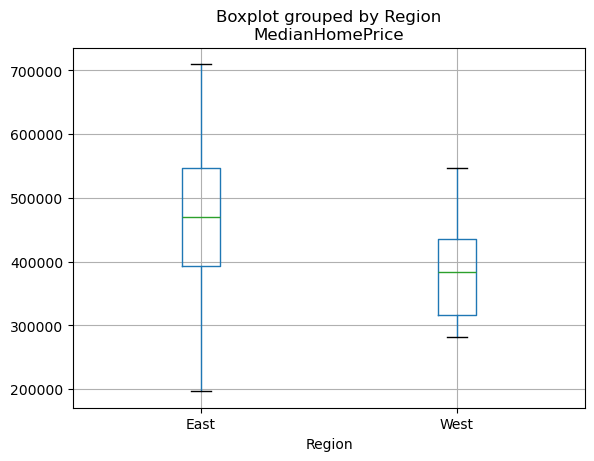

In [434]:
master.boxplot(column="MedianHomePrice", by="Region") # Making Boxplot of the median home price compared by region

<Axes: title={'center': 'MedianRent'}, xlabel='Region'>

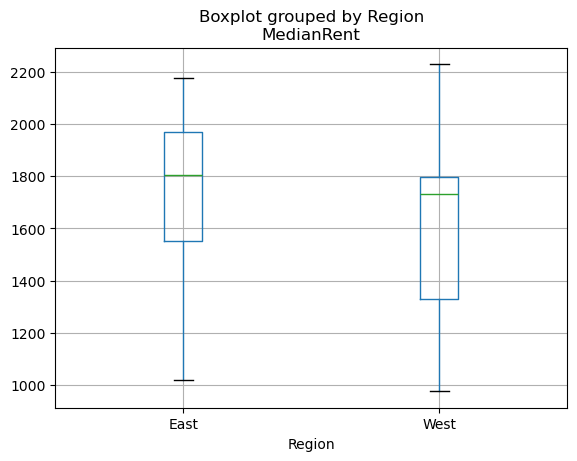

In [436]:
master.boxplot(column="MedianRent", by="Region") # Making Boxplot of the median home rent compared by region

<Axes: title={'center': 'MedianHouseholdIncome'}, xlabel='Region'>

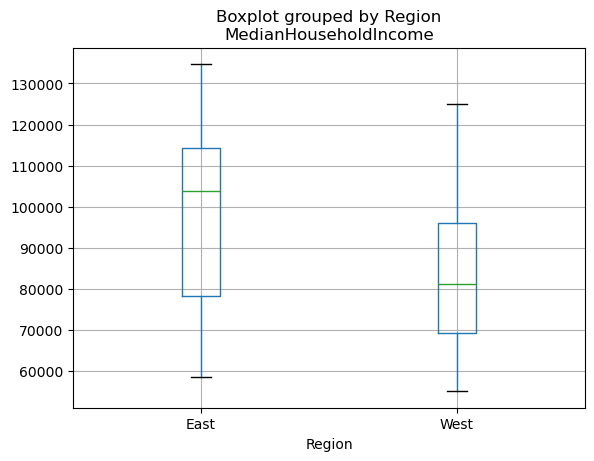

In [438]:
master.boxplot(column="MedianHouseholdIncome", by="Region") # Making Boxplot of the median household income compared by region

<Axes: title={'center': 'HousingCostBurdenPct'}, xlabel='Region'>

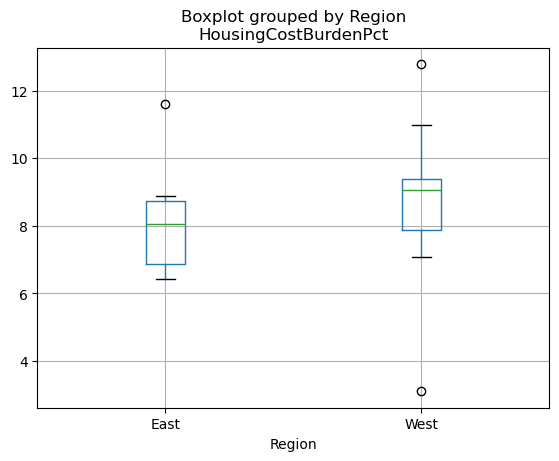

In [440]:
master.boxplot(column="HousingCostBurdenPct", by="Region") # House Burden per region

In [442]:
master.corr(numeric_only=True) # is related to the others. Values close to 1 or -1 indicate strong relationships.

,MedianRent,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct,PriceToIncome
MedianRent,1.000000,0.684934,0.911783,0.601854,0.181058,-0.168045,-0.181736
MedianHomePrice,0.684934,1.000000,0.795042,0.226572,0.235650,0.166215,0.496518
MedianHouseholdIncome,0.911783,0.795042,1.000000,0.423485,0.158327,-0.075420,-0.109785
LaborForce,0.601854,0.226572,0.423485,1.000000,0.480501,-0.296583,-0.263735
cpop,0.181058,0.235650,0.158327,0.480501,1.000000,-0.057795,0.111520
HousingCostBurdenPct,-0.168045,0.166215,-0.075420,-0.296583,-0.057795,1.000000,0.314869
PriceToIncome,-0.181736,0.496518,-0.109785,-0.263735,0.111520,0.314869,1.000000


<Axes: >

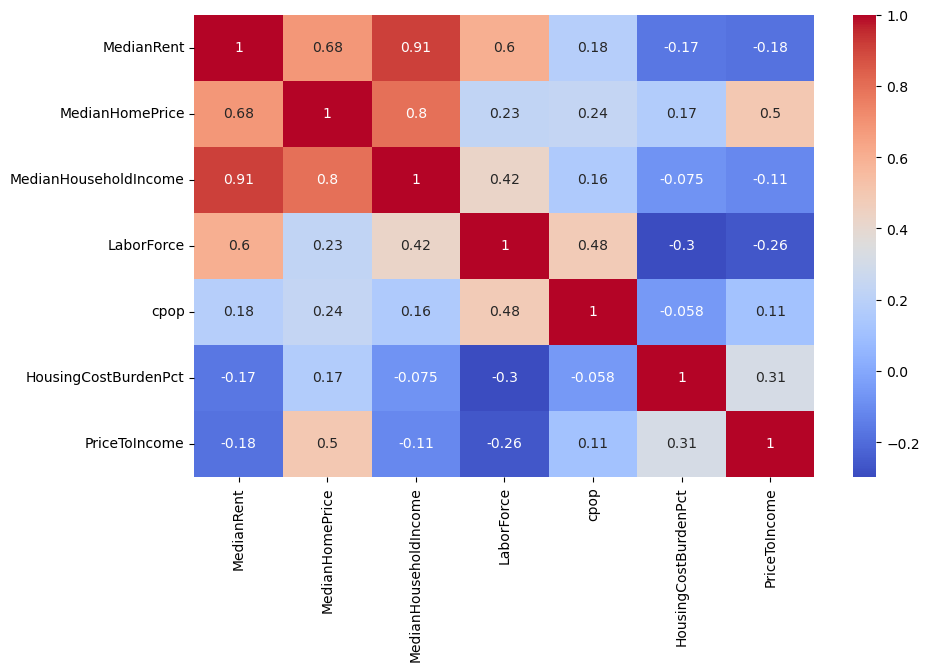

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(master.corr(numeric_only=True), annot=True, cmap="coolwarm") # Visual correlation using a heat map

In [446]:
master.to_csv("Final_Capstone_MasterDataset.csv", index=False) #Creating a masterDataset to include all of the valuable information

In [448]:
master.groupby("Region").mean(numeric_only=True) 

,MedianRent,MedianHomePrice,MedianHouseholdIncome,LaborForce,cpop,HousingCostBurdenPct,PriceToIncome
Region,,,,,,,
East,1720.000000,465400.000000,97453.428571,65.464286,227346.000000,8.184286,4.729954
West,1604.818182,381463.636364,84294.727273,59.465455,86528.090909,8.652727,4.608684


In [454]:
income = master["MedianHouseholdIncome"]
homeprice = master["MedianHomePrice"]

# Compute Pearson correlation
corr, p_value = stats.pearsonr(income, homeprice)
# Income vs the home price correlation 
print("H11 — Income vs. Home Price")
print("Correlation:", corr)
print("p-value:", p_value)

if corr > 0:
    print("➡ Positive association found (supports H11)")
else:
    print("➡ No positive relationship (does NOT support H11)")

H11 — Income vs. Home Price
Correlation: 0.7950415615671527
p-value: 8.044102197764643e-05
➡ Positive association found (supports H11)


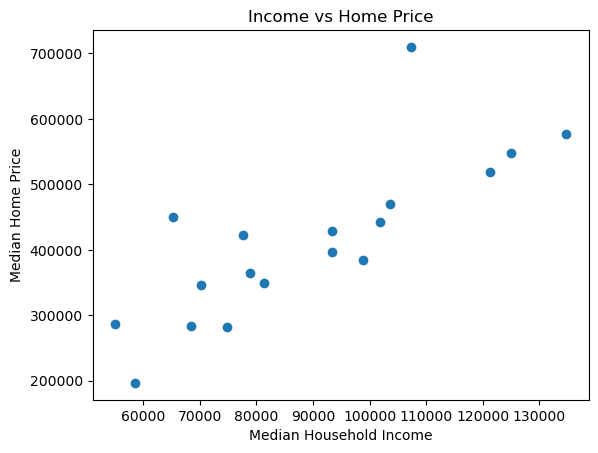

In [456]:
import matplotlib.pyplot as plt

plt.scatter(income, homeprice)
plt.xlabel("Median Household Income")
plt.ylabel("Median Home Price")
plt.title("Income vs Home Price")
plt.show()

In [458]:
labor = master["LaborForce"]

# LaborForce vs Home Price
corr_hp, p_hp = stats.pearsonr(labor, master["MedianHomePrice"])

# LaborForce vs Rent
corr_rent, p_rent = stats.pearsonr(labor, master["MedianRent"])

# LaborForce vs Price-to-Income (affordability)
corr_aff, p_aff = stats.pearsonr(labor, master["PriceToIncome"])

print("H12 — Employment Growth (Labor Force) Relationships")
print("LaborForce vs HomePrice correlation:", corr_hp)
print("LaborForce vs Rent correlation:", corr_rent)
print("LaborForce vs PriceToIncome (affordability) correlation:", corr_aff)

# Interpretation
if corr_hp > 0 and corr_rent > 0 and corr_aff > 0:
    print("➡ Higher employment appears associated with higher housing costs (supports H12)")
else:
    print("➡ Mixed or negative associations (partial support or no support for H12)")

H12 — Employment Growth (Labor Force) Relationships
LaborForce vs HomePrice correlation: 0.22657235559351183
LaborForce vs Rent correlation: 0.6018536709901108
LaborForce vs PriceToIncome (affordability) correlation: -0.26373466484106595
➡ Mixed or negative associations (partial support or no support for H12)


In [460]:
east = master[master["Region"] == "East"]["PriceToIncome"]
west = master[master["Region"] == "West"]["PriceToIncome"]

t_stat, p_val = stats.ttest_ind(east, west, equal_var=False)

print("H14 — East vs West Affordability Difference")
print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("➡ Significant difference detected (supports H14)")
else:
    print("➡ No statistically significant difference (does NOT support H14)")

H14 — East vs West Affordability Difference
t-statistic: 0.25850654423332703
p-value: 0.8006966294319877
➡ No statistically significant difference (does NOT support H14)
